In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
# print(heart_disease.metadata) 
  
# variable information 
print(type(X)) 


<class 'pandas.core.frame.DataFrame'>


In [9]:
type(heart_disease.data.features)

pandas.core.frame.DataFrame

In [24]:
data = X
data['target'] = y

In [29]:
data['target'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

In [30]:
def result(i):
    if i==0:
        return 'Absence'
    else:
        return 'Presence'

In [31]:
data['disease'] = data['target'].apply(result)

In [38]:
data['disease'].value_counts()

Absence     164
Presence    139
Name: disease, dtype: int64

In [39]:
# similarly create age category
def age_rng(r):
    if r>=29 and r<40:
        return 'Young Age'
    elif r>=40 and r<55:
        return 'Middle Age'
    elif r>55:
        return 'Elder Age'


In [ ]:
df['Age_Range']=df['age'].apply(age_rng)
df.head()

In [43]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        2
target      0
disease     0
dtype: int64

In [42]:
data['ca'].fillna(data['ca'].median(),inplace=True)

C:\Users\Nagananda\AppData\Local\Temp\ipykernel_24432\396750931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ca'].fillna(data['ca'].median(),inplace=True)


In [44]:
data['thal'].fillna(data['thal'].median(),inplace=True)

In [46]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
disease     0
dtype: int64

In [51]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
disease      object
dtype: object

In [54]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1d2d28fbb20>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2d290d040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2d28fb850>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2d290d5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2d290d8b0>],
 'means': []}

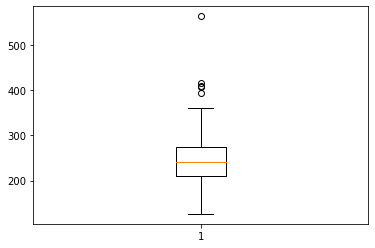

In [57]:
plt.boxplot(data['chol'])

In [ ]:
#Detecting Outliers using Inter Quartile Range
#Finding The data located in First Quartile and Third Quartile
#If the data point significantly differs from other cluster of data points then removing the data point
outliers_chol = []
def Find_Outliers(data):
    data = sorted(data)
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
 
    IQR = Q3-Q1
    l_bound = Q1-(1.5*IQR)
    u_bound = Q3+(1.5*IQR)
   
    for j in data: 
        if (j < l_bound or j > u_bound):
            outliers_chol.append(j)
    return outliers_chol

outliers_chol = Find_Outliers(df['chol'])
print("Outliers from IQR method for chol column: ", outliers_chol)

In [ ]:
#Replacing the outliers in the chol column with the mean
for i in outliers_chol:
    df['chol'] = np.where(df['chol'] == i, df['chol'].mean(), df['chol'])

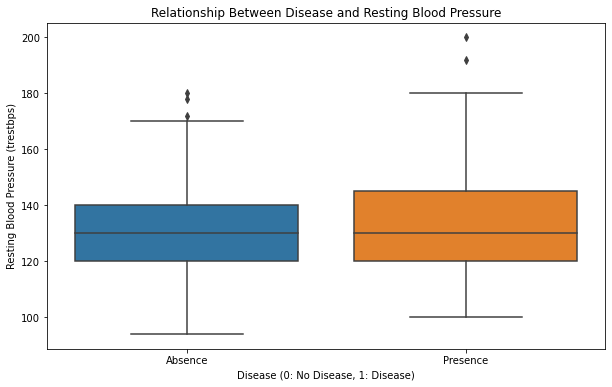

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot or violin plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Using a box plot
sns.boxplot(x=data['disease'], y=data['trestbps'])

# Using a violin plot
# sns.violinplot(x=data['disease'], y=data['trestbps'])

plt.title("Relationship Between Disease and Resting Blood Pressure")
plt.xlabel("Disease (0: No Disease, 1: Disease)")
plt.ylabel("Resting Blood Pressure (trestbps)")

plt.show()


ValueError: x and y must be the same size

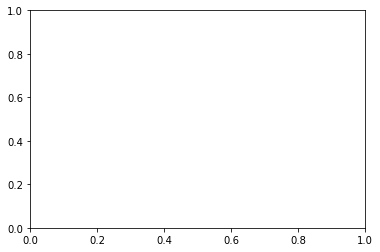

In [110]:
plt.scatter(data.index[data['disease']=='Absence'],data['trestbps'])
plt.scatter(data.index[data['disease']=='Presence'],data['trestbps'])


In [106]:
data.index['disease']

Int64Index([  0,   3,   4,   5,   7,  10,  11,  13,  14,  15,
            ...
            277, 279, 281, 283, 287, 288, 289, 291, 295, 302],
           dtype='int64', length=164)

In [98]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,Absence
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Presence
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Presence
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Absence
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,Absence
